# Ejercicio 3  Métodos numéricos y aplicaciones en el mundo real

## Teoría


### 1. a. Compare críticamente: Método de Euler vs. Runge-Kutta para la integración


Método de Euler: 
Para la integración tenemos primeritas diferencias la mas rapida de identificar es como el método de Euler es de primer orden. 

Por otro lado este método puede llegar a ser inestable porque es necesario reducir considerablemente el tamaño del paso (h) (Akinsola, 2023) de manera que incrementa el numero de iteraciones y entonces el esfuerzo computacional. 

Runge-Kutta: 
En el caso de Runge-Kutta este es de orden 4 orden superior lo que por definicion le da mayor estabilidad, incluso con tamaños de paso grandes. 

Este usa una combinación ponderada de 4 evaluacions de la derivada por paso, capturando el comportamiento de la funcion. 

Diferencias: 

- Orden del método: El método de Euler tiene orden 1 y el de Runge-Kutta orden 4

- Estabilidad: El de Euler tiene estabilidad limitada al tamaño de paso y Runge-Kutta es más estable.

- Precisión: Euler tiene una precisoón muy baja considerando que h no sea muy pequeño, Runge-Kutta tiene precisión alta aún con pasos moderados.

- Coste: Euler es bajo por paso, Runge-Kutta es mayor por paso aunque se necesiten menos pasos.

#### 1. b. Compensación entre precisión y coste computacional.

Considerando la precisión y coste, el método de Euler tiene bajo coste computacional nuevamente porque solo realiza una evaluacion de la función por cada iteración, pero su precisión es bajo dependiendo del sistema, entonces para compensar nuevamente se necesita usar un tamaño h pequeño aumentando las iteraciones y el tiempo total de calculo.

Por otro lado, el Runge-Kutta tiene alta precisión por paso entocnes tiende a pesar mas computacionalmente se podría definir que un 4 pero al ser ucho mas preciso, y reduce el numero de procesos.

---

2. ### Explique cómo los retrasos en los ciclos de retroalimentación (p. ej., el retraso en las pruebas durante (epidemias) afectan el comportamiento del sistema.

El retraso pasa cuando la información o la acción correctiva llega con cierto desfase respecto al momento en que el problema ocurre. Entonces en la epidemia el retraso seria que los resultados de las vacunas que se atrasan aunque exista la posibilidad que en efecto sesa contagiado y esete infectando gente.

Entonces estas pueden dar respuestas imprecisas, y poco oportunas entonces puede causar caos

---
3. ### Proponga un modelo de stock-flujo para capacidad hospitalaria durante una epidemia.

Stocks: 

- Pacientes
- Capacidad de camas disponibles
- Pacientes en UCI
- Camas UCI disponibles

Flujos: 

- Ingresos de pacientes
- Ingresos a UCI
- Recuperados
- Recuperados UCI
- Transferencia de hospital a UCI
- Muerte
- Expansión o reducción de camas
- Expansión o reducción de camas UCI

Variables: 
- Tasa de infección
- tasa_infección: proporción de infectados que necesitan hospitalización
- duración promedio
- duración promedio UCI 
- tasa de mortalidad
- tasa de mortalidad UCI
- Retraso en expansión hospitalaria
- Retraso en expansión hospitalaria UCI 

ECUACIONES:

Ingresos de pacientes: tasa_infección * infectados

Recuperados: pacientes/duracion promedio

Muerte hospitalario: pacientes * tasa de mortalidad

Pacientes hospitalizados = integral(ingresos de pacientes - recueperados - muerte)dt

Camas_UCI_disponibles(t) = Camas_UCI_iniciales 
                         + ∫ (adición_UCI - ocupación_UCI + altas_UCI + fallecidos_UCI) dt

Pacientes_UCI(t) = ∫ (ingreso_UCI + transferencia_a_UCI - alta_UCI - muerte_UCI) dt

Pedido a Inteligencia: "generame las ecuaciones para el siguiente modelo"

---
### Para el Método de Euler
a. Indique cómo se define el error local de truncamiento

se define como la diferencia entre la solución exacta de la ecuación diferencial y la aproximación dada por una sola iteración del método.


b. Enumere dos ventajas y desventajas del método

Ventajas:

1. Simplicidad
2. Costo bajo por paso: Solo requiere una evaluación de la función f(x,y) por iteración.

Desventajas: 

1. Baja precisión: al ser primer orden, se requiere un paso muy pequeño para obtener resultados aceptables.

2. Inestabilidad no lineales: Puede producir resultados inestables.

c. Explique el algoritmo

Se basa en la definición de derivada como razón de cambio y utiliza una pendiente constante entre dos puntos consecutivos. Se basa en 3 pasos: Datos iniciales siendo funcion derivada, condicion inicial paso h numero de pasos, iteración y el resultado obteniendo una secuencia de putnso que aproximan la solución de la EDO. 

---
### Para el método de Runge-Kutta (RK4):
a. Explique el algoritmo y principalmente los cuatro pasos intermedios

es un método numérico de un solo paso, pero de cuarto orden de precisión

algoritmo: 

Primer paso intermedio (pendiente inicial), 

k1 = h * f(x_n, y_n)

Segundo paso intermedio (pendiente en el punto medio usando k1), 

k2 = h * f(x_n + h/2, y_n + k1/2)

Tercer paso intermedio (otra pendiente en el punto medio usando k2), 

k3 = h * f(x_n + h/2, y_n + k2/2)

Cuarto paso intermedio (pendiente al final del paso)

k4 = h * f(x_n + h, y_n + k3)

Fórmula para actualizar y: 

y_{n+1} = y_n + (1/6) * (k1 + 2*k2 + 2*k3 + k4)



b. Compare el error global con el de Euler

Euler error local: O(h^2), Euler error global: O(h)

RK4 Error local: O(h^5), RK4 error global: O(h^4)

El error global de RK4 decrece mucho más rápidamente con el tamaño de paso que el de Euler.

c. ¿Cuándo vale la pena utilizar RK4 considerando el costo computacional?

- Se requiere alta precisión sin reducir drásticamente el tamaño del paso.

- La función es no lineal o tiene comportamientos complejos, como en sistemas dinámicos tipo Lorenz.

- El modelo tiene un horizonte largo de simulación, y el acumulamiento de error con Euler sería crítico.

- El sistema no es extremadamente rígido, porque RK4 no es el mejor para problemas rígidos (en esos casos se usan métodos implícitos).

## Referencias

Akinsola, V. (2023). Numerical Methods: Euler and Runge-Kutta. En IntechOpen eBooks. https://doi.org/10.5772/intechopen.108533 

# Practica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
r = 0.1
K = 1000
x0 = 10
t_max = 100

def logistic_model(t, x):
    return r * x * (1 - x / K)

def euler(f, x0, t0, t_max, dt):
    n = int((t_max - t0) / dt)
    t_values = np.linspace(t0, t_max, n+1)
    x_values = np.zeros(n+1)
    x_values[0] = x0
    for i in range(n):
        x_values[i+1] = x_values[i] + dt * f(t_values[i], x_values[i])
    return t_values, x_values

def rk4(f, x0, t0, t_max, dt):
    n = int((t_max - t0) / dt)
    t_values = np.linspace(t0, t_max, n+1)
    x_values = np.zeros(n+1)
    x_values[0] = x0
    for i in range(n):
        t = t_values[i]
        x = x_values[i]
        k1 = dt * f(t, x)
        k2 = dt * f(t + dt/2, x + k1/2)
        k3 = dt * f(t + dt/2, x + k2/2)
        k4 = dt * f(t + dt, x + k3)
        x_values[i+1] = x + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t_values, x_values


In [ ]:
# Solución de referencia con RK4 y paso muy pequeño
t_ref, x_ref = rk4(logistic_model, x0, 0, t_max, 0.001)

# Soluciones con dt = 1.0
dt_test = 1.0
t_euler, x_euler = euler(logistic_model, x0, 0, t_max, dt_test)
t_rk4, x_rk4 = rk4(logistic_model, x0, 0, t_max, dt_test)

def get_value_at_t(t_values, x_values, target_t):
    idx = np.where(t_values == target_t)[0]
    if len(idx) == 0:
        raise ValueError("t objetivo no encontrado")
    return x_values[idx[0]]

x_true = get_value_at_t(t_ref, x_ref, 50)
x_eu = get_value_at_t(t_euler, x_euler, 50)
x_rk = get_value_at_t(t_rk4, x_rk4, 50)

# Error relativo
error_rel_euler = abs(x_eu - x_true) / abs(x_true)
error_rel_rk4 = abs(x_rk - x_true) / abs(x_true)

print(f"Valor real en t=50 (referencia RK4 dt=0.001): {x_true:.6f}")
print(f"Euler (dt=1.0) en t=50: {x_eu:.6f} → Error relativo: {error_rel_euler:.6%}")
print(f"RK4 (dt=1.0) en t=50: {x_rk:.6f} → Error relativo: {error_rel_rk4:.6%}")


Valor real en t=50 (referencia RK4 dt=0.001): 599.859602
Euler (dt=1.0) en t=50: 561.046633 → Error relativo: 6.470342%
RK4 (dt=1.0) en t=50: 599.859118 → Error relativo: 0.000081%


# Pregunta 1

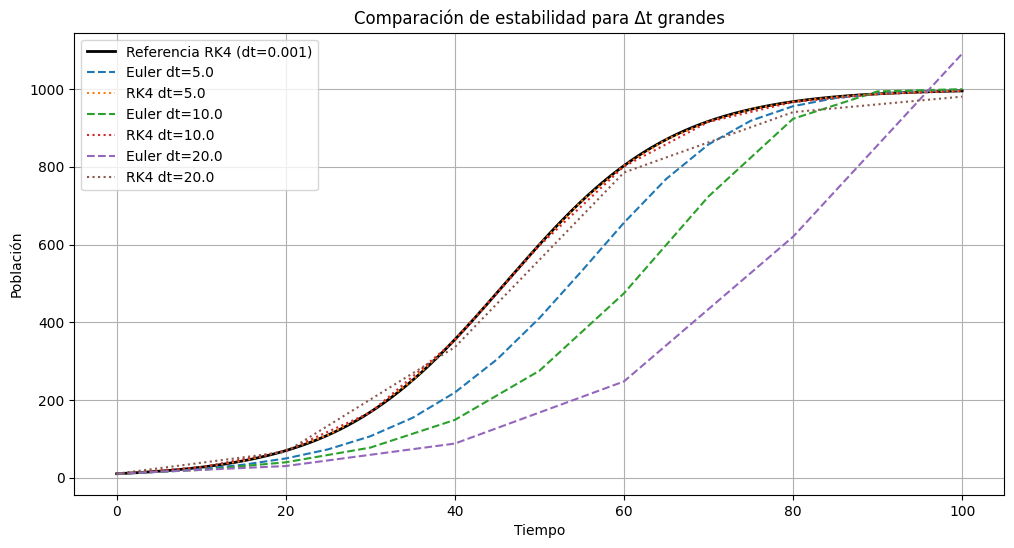

In [ ]:
large_dts = [5.0, 10.0, 20.0]

plt.figure(figsize=(12, 6))

t_ref_plot, x_ref_plot = rk4(logistic_model, x0, 0, t_max, 0.001)
plt.plot(t_ref_plot, x_ref_plot, label="Referencia RK4 (dt=0.001)", color="black", linewidth=2)

for dt in large_dts:
    t_eu, x_eu = euler(logistic_model, x0, 0, t_max, dt)
    t_rk, x_rk = rk4(logistic_model, x0, 0, t_max, dt)
    
    plt.plot(t_eu, x_eu, '--', label=f"Euler dt={dt}")
    plt.plot(t_rk, x_rk, ':', label=f"RK4 dt={dt}")

plt.title("Comparación de estabilidad para Δt grandes")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.grid(True)
plt.show()


Para un paso de integración 

Δt=1.0, el método de Euler presentó un error relativo en t=50, mientras que el método de Runge-Kutta 4 (RK4) tuvo un error relativo mucho menor 


Esto demuestra que RK4 es más preciso que Euler para este modelo no lineal hasta con pasos como 1.0. Euler se aleja visiblemente de la curva real, mientras que RK4 prácticamente la reproduce con gran fidelidad.

# Pregunta 2

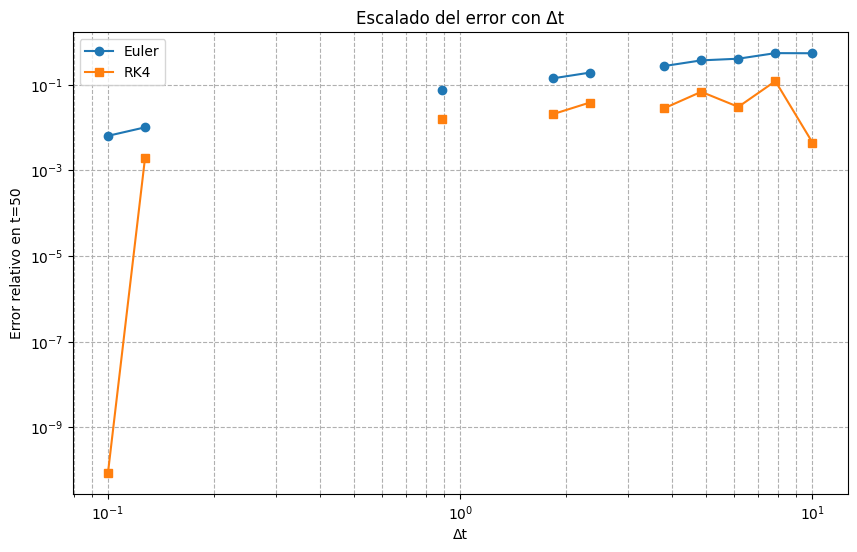

In [9]:
# Delta ts para análisis de error
dt_values = np.logspace(-1, 1, 20)  # de 0.1 a 10 en escala log

error_euler = []
error_rk4 = []

# Obtener el valor "real" como referencia
x_true_50 = get_value_at_t(t_ref, x_ref, 50)

for dt in dt_values:
    try:
        t_eu, x_eu = euler(logistic_model, x0, 0, t_max, dt)
        x_eu_50 = get_value_at_t(t_eu, x_eu, 50)
        err_eu = abs(x_eu_50 - x_true_50) / abs(x_true_50)
    except:
        err_eu = np.nan
    
    try:
        t_rk, x_rk = rk4(logistic_model, x0, 0, t_max, dt)
        x_rk_50 = get_value_at_t(t_rk, x_rk, 50)
        err_rk = abs(x_rk_50 - x_true_50) / abs(x_true_50)
    except:
        err_rk = np.nan

    error_euler.append(err_eu)
    error_rk4.append(err_rk)

# Graficar errores en escala log-log
plt.figure(figsize=(10, 6))
plt.loglog(dt_values, error_euler, 'o-', label='Euler')
plt.loglog(dt_values, error_rk4, 's-', label='RK4')
plt.xlabel('Δt')
plt.ylabel('Error relativo en t=50')
plt.title('Escalado del error con Δt')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


RK4 es mucho más preciso que Euler para cualquier valor de Δt, especialmente para pasos pequeños.

El error de Euler crece linealmente con el tamaño del paso, el de RK4 decrece

# Pregunta 3

Euler se elige cuando la prioridad es la simplicidad, velocidad o bajo costo computacional, y se puede trabajar con pasos pequeños.

Normalmente, RK4 es preferible por su precisión y estabilidad superiores.